In [1]:
import numpy as np
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt

<h1>TASK 3</h1>

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

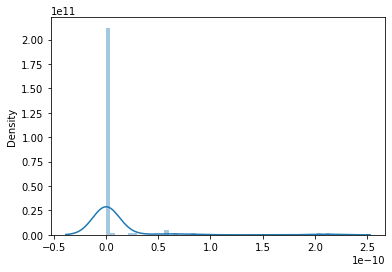

In [2]:
sum_of = 0
pvalue_list = list()
for i in range(100):
    data = np.random.laplace(0, 1, 1000)
    pvalue = stats.normaltest(data)
    pvalue_list.append(pvalue.pvalue)
    sum_of += pvalue.pvalue
sum_of/100
sb.distplot(pvalue_list)

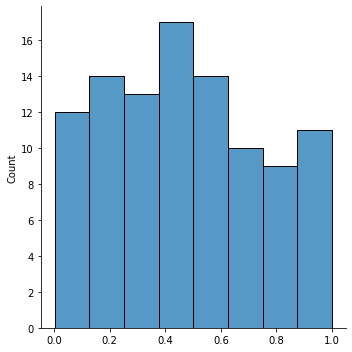

In [3]:
sum_of = 0
pvalue_list = list()
for i in range(100):
    data = np.random.normal(0, 1, 1000)
    pvalue = stats.normaltest(data)
    pvalue_list.append(pvalue.pvalue)
    sum_of += pvalue.pvalue
sum_of/100
sb.displot(pvalue_list)

In [4]:
import math

def comb_dis(x):
    if abs(x) > 1:
        return 1/sqrt(2*math.pi)*math.exp(-1/2*x**2)
    else:
        return x

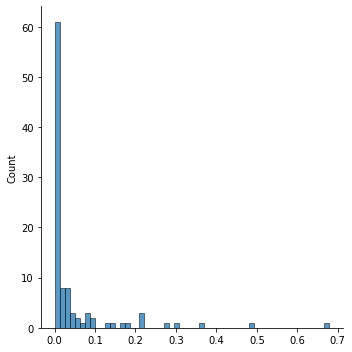

In [5]:
sum_of = 0
pvalue_list = list()
for i in range(100):
    data0 = np.random.normal(0, 1, 10000)
    data1 = np.random.uniform(-1, 1, 10000)
    new_data = list()
    for i, elem in enumerate(data0):
        if abs(elem) < 1:
            new_data.append(data1[i])
        else:
            new_data.append(data0[i])
    
    pvalue = stats.normaltest(new_data)
    pvalue_list.append(pvalue.pvalue)
    sum_of += pvalue.pvalue
sum_of/100
sb.displot(pvalue_list)

<h2>ANDERSON-DARLING b) ii)</h2>

In [6]:
#C = 4.49 quantile alpha = 0.05

l = 3

pvalue_list = list()

for i in range(100):
    data = np.random.exponential(l, 100)
    anderson = stats.anderson(data, 'expon')
    pvalue = anderson.statistic
    pvalue_list.append(pvalue)
#sb.displot(pvalue_list, kind='kde')
max(pvalue_list)

2.077141771136098

In [7]:
pvalue_list = list()

for i in range(100):
    data = np.zeros(100)
    for k in range(1):
        data0 = np.random.normal(0, 1, 100)
        data += data0**2
    anderson = stats.anderson(data, 'expon')
    pvalue = anderson.statistic
    pvalue_list.append(pvalue)
#sb.displot(pvalue_list, kind='kde')
max(pvalue_list), min(pvalue_list)

(19.395750481005294, 3.0502213232005744)

<h2>SHAPIRO</h2>

In [8]:
l = 3

n = 100

stats_data = list()

for i in range(100):
    data = np.random.exponential(l, n)
    X1 = min(data)
    Xm = data.mean()
    result = 0
    for elem in data:
        result += (elem - Xm)**2
    res = (n*(Xm - X1)**2)/((n-1)*result)
    stats_data.append(res)
    
#sb.displot(pvalue_list, kind='kde')
max(stats_data), min(stats_data)

(0.01607108026367857, 0.006158184873216192)

In [9]:
n = 100

stats_data = list()

for i in range(100):
    data = np.zeros(n)
    for k in range(1):
        data0 = np.random.normal(0, 1, n)
        data += data0**2
    X1 = min(data)
    Xm = data.mean()
    result = 0
    for elem in data:
        result += (elem - Xm)**2
    res = (n*(Xm - X1)**2)/((n-1)*result)
    stats_data.append(res)
stats_data = np.array(stats_data)
#sb.displot(pvalue_list, kind='kde')
max(stats_data), min(stats_data), stats_data.mean()

(0.008863285219914877, 0.0029671833396168142, 0.005494451796250878)

<h1>??</h1>

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

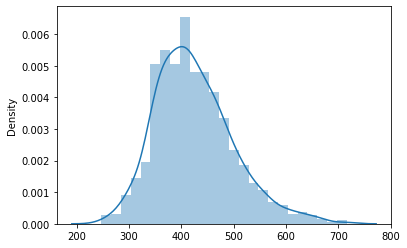

In [10]:
l = 3

n = 1000

stats_data = list()

for i in range(1000):
    data = np.random.exponential(l, n)
    stat = stats.normaltest(data).statistic
    stats_data.append(stat)
    
#sb.displot(pvalue_list, kind='kde')
sb.distplot(stats_data)

<h1>TASK 1</h1>

In [11]:
pnormal = list()
# (-inf, -3), ... .... (3, inf)

normal_data = np.random.normal(0, 1, 10000)
curr_data = abs(normal_data[normal_data < -3])
curr_data = (curr_data > 0).astype('float32')
pnormal.append(curr_data.sum()/10000)

intervals = [[-3, -2], [-2, -1], [-1, 0], [0, 1], [1, 2], [2, 3]]

for elem in intervals:
    curr_data = abs(normal_data[(normal_data > elem[0]) & (normal_data < elem[1])])
    curr_data = (curr_data > 0).astype('float32')
    pnormal.append(curr_data.sum()/10000)
curr_data = abs(normal_data[normal_data > 3])
curr_data = (curr_data > 0).astype('float32')
pnormal.append(curr_data.sum()/10000)
pnormal

[0.0009, 0.0197, 0.1338, 0.345, 0.3383, 0.1395, 0.0221, 0.0007]

<h1>ДИСКРЕТИЗАЦИЯ</h1>

In [12]:
def func_get_freq_0(data):
    p = list()
    # (-inf, -3), ... .... (3, inf)
    n = len(data)

    curr_data = abs(data[data < -3])
    curr_data = (curr_data > 0).astype('float32')
    p.append(curr_data.sum())

    intervals = [[-3, -2], [-2, -1], [-1, 0], [0, 1], [1, 2], [2, 3]]

    for elem in intervals:
        curr_data = abs(data[(data > elem[0]) & (data < elem[1])])
        curr_data = (curr_data > 0).astype('float32')
        p.append(curr_data.sum())
    curr_data = abs(data[data > 3])
    curr_data = (curr_data > 0).astype('float32')
    p.append(curr_data.sum())
    return p

In [13]:
def func_get_freq_1(data):
    p = list()
    # (-inf, -3), ... .... (3, inf)
    n = len(data)

    curr_data = abs(data[data < -1])
    curr_data = (curr_data > 0).astype('float32')
    p.append(curr_data.sum())

    intervals = [[-1, 1]]

    for elem in intervals:
        curr_data = abs(data[(data > elem[0]) & (data < elem[1])])
        curr_data = (curr_data > 0).astype('float32')
        p.append(curr_data.sum())
    curr_data = abs(data[data > 1])
    curr_data = (curr_data > 0).astype('float32')
    p.append(curr_data.sum())
    return p

In [14]:
pnormal = func_get_freq_1(np.random.normal(0, 1, 10000))
np.array(pnormal)

array([1597., 6813., 1590.], dtype=float32)

In [15]:
anderson_stats = list()

for i in range(1000):
    data = np.random.normal(0, 1, 1000)
    and_darling = stats.anderson(data, 'norm').statistic
    anderson_stats.append(and_darling)
anderson_stats = np.array(anderson_stats)

<h1>LAPLACE CHECK</h1>

0.000999000999000999

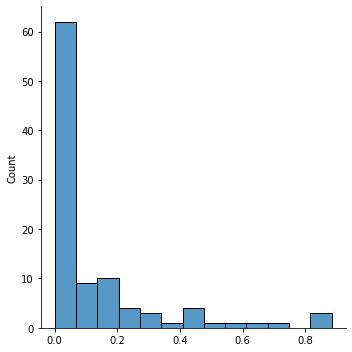

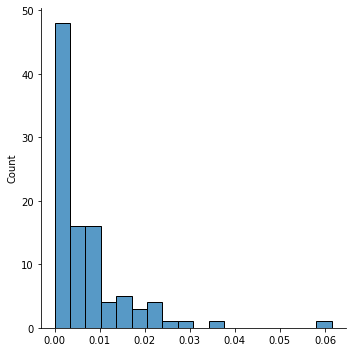

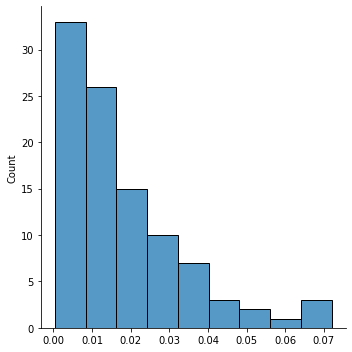

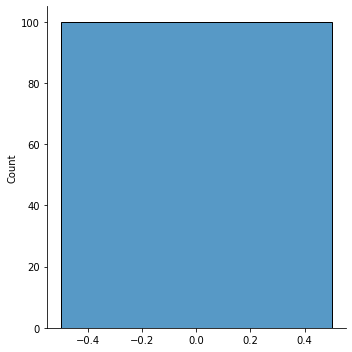

In [16]:
ch_pvalue = list()
kv_pvalue = list()
cramer_pvalue = list()
and_darling_pvalue = list()

mu = 0
sigma = 1

pnormal = func_get_freq_1(np.random.normal(0, 1, 1000))

for i in range(100):
    data = np.random.laplace(mu, sigma, 1000)
    p_curr = func_get_freq_1(data)
    
    chisquare = stats.chisquare(p_curr, pnormal).pvalue
    
    kv = stats.kstest(data, stats.norm(mu, sigma).cdf).pvalue
    cramer = stats.cramervonmises(data, stats.norm(mu, sigma).cdf).pvalue
    and_darling = stats.anderson(data, 'norm').statistic
    ch_pvalue.append(chisquare)
    kv_pvalue.append(kv)
    cramer_pvalue.append(cramer)
    
    m = (anderson_stats > and_darling).astype('int').sum()
    
    and_darling_pvalue.append((m+1)/1001)
    
#fig, ax = plt.subplots(4, 2, figsize=(20, 10))

for j, p_data in enumerate([ch_pvalue, kv_pvalue, cramer_pvalue, and_darling_pvalue]):
    p_data = np.array(p_data)
    
    sb.displot(p_data)
np.array(and_darling_pvalue).mean()

<h1>NORMAL CHECK</h1>

0.5195874125874125

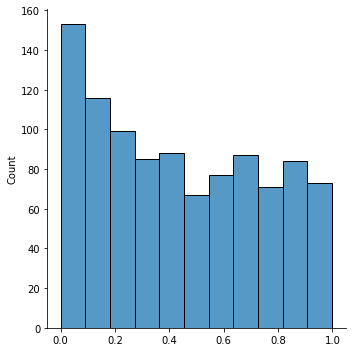

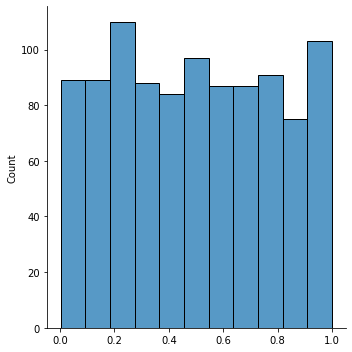

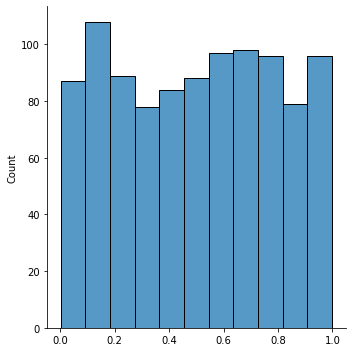

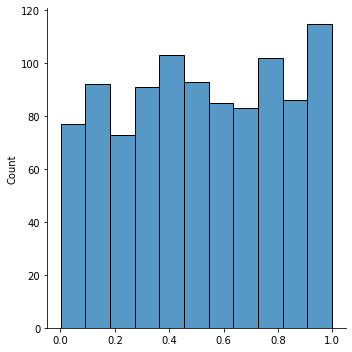

In [17]:
ch_pvalue = list()
kv_pvalue = list()
cramer_pvalue = list()
and_darling_pvalue = list()

mu = 0
sigma = 1

pnormal = func_get_freq_1(np.random.normal(0, 1, 10000))

for i in range(1000):
    data = np.random.normal(0, 1, 10000)
    
    p_curr = func_get_freq_1(data)
    
    chisquare = stats.chisquare(p_curr, pnormal).pvalue
    
    kv = stats.kstest(data, stats.norm(mu, sigma).cdf).pvalue
    cramer = stats.cramervonmises(data, stats.norm(mu, sigma).cdf).pvalue
    and_darling = stats.anderson(data, 'norm').statistic
    ch_pvalue.append(chisquare)
    kv_pvalue.append(kv)
    cramer_pvalue.append(cramer)
    
    m = (anderson_stats > and_darling).astype('int').sum()
    
    and_darling_pvalue.append((m+1)/1001)
    
#fig, ax = plt.subplots(4, 2, figsize=(20, 10))

for j, p_data in enumerate([ch_pvalue, kv_pvalue, cramer_pvalue, and_darling_pvalue]):
    p_data = np.array(p_data)
    
    
    count, bins_count = np.histogram(p_data, bins=20)
    
    # finding the PDF of the histogram using count values
    pdf = count / sum(count)

    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    
    #ax[j, 0].plot(bins_count[1:], pdf, color="red", label="PDF")
    #ax[j, 0].plot(bins_count[1:], cdf, label="CDF")
    #ax[j, 1].hist(p_data, bins=20)
    #ax[j, 0].legend()
    sb.displot(p_data)
np.array(and_darling_pvalue).mean()

<h1>UNIFORM AND NORMAL</h1>

0.08104895104895106

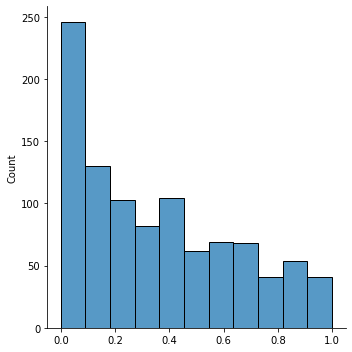

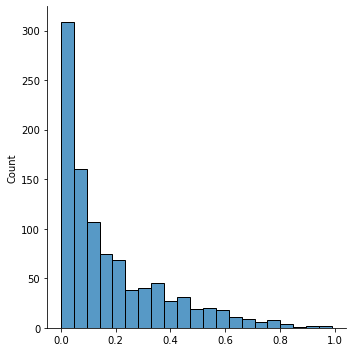

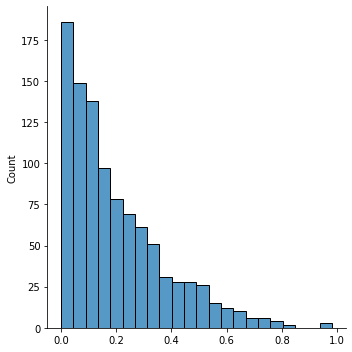

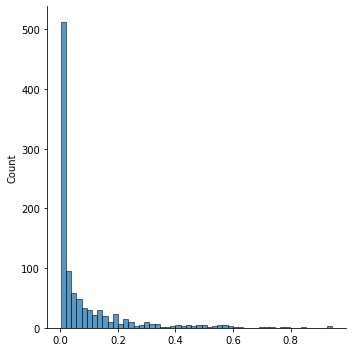

In [20]:
ch_pvalue = list()
kv_pvalue = list()
cramer_pvalue = list()
and_darling_pvalue = list()

mu = 0
sigma = 1

pnormal = func_get_freq_0(np.random.normal(0, 1, 1000))

for i in range(1000):
    data = np.random.normal(0, 1, 1000)
    data1 = np.random.uniform(-1, 1, 1000)
    
    for i in range(len(data)):
        if abs(data[i]) < 1:
            data[i] = data1[i]  
    
    p_curr = func_get_freq_0(data)
    
    chisquare = stats.chisquare(p_curr, pnormal).pvalue
    
    kv = stats.kstest(data, stats.norm(mu, sigma).cdf).pvalue
    cramer = stats.cramervonmises(data, stats.norm(mu, sigma).cdf).pvalue
    and_darling = stats.anderson(data, 'norm').statistic
    ch_pvalue.append(chisquare)
    kv_pvalue.append(kv)
    cramer_pvalue.append(cramer)
    
    m = (anderson_stats > and_darling).astype('int').sum()
    
    and_darling_pvalue.append((m+1)/1001)
    
#fig, ax = plt.subplots(4, 2, figsize=(20, 10))

for j, p_data in enumerate([ch_pvalue, kv_pvalue, cramer_pvalue, and_darling_pvalue]):
    p_data = np.array(p_data)
    
    
    count, bins_count = np.histogram(p_data, bins=20)
    
    # finding the PDF of the histogram using count values
    pdf = count / sum(count)

    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    
    #ax[j, 0].plot(bins_count[1:], pdf, color="red", label="PDF")
    #ax[j, 0].plot(bins_count[1:], cdf, label="CDF")
    #ax[j, 1].hist(p_data, bins=20)
    #ax[j, 0].legend()
    sb.displot(p_data)
np.array(and_darling_pvalue).mean()

<h1>STUDENT </h1>

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:6707: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


0.01041317365269461

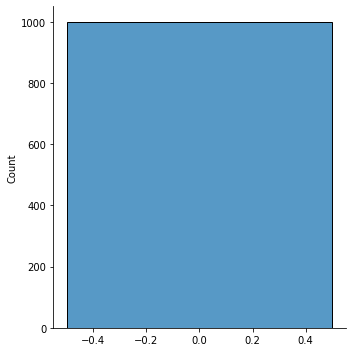

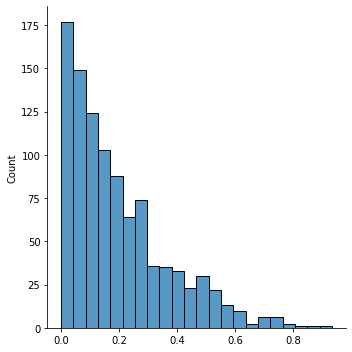

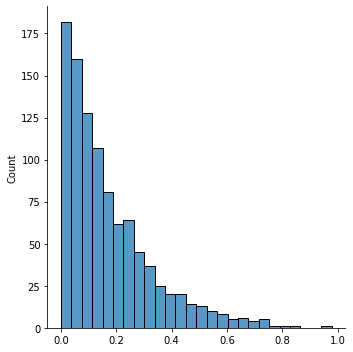

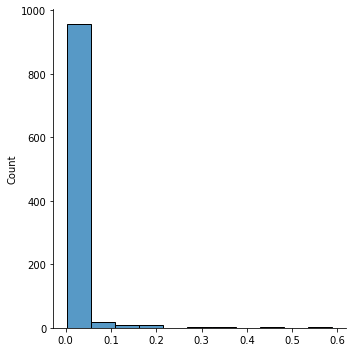

In [28]:
ch_pvalue = list()
kv_pvalue = list()
cramer_pvalue = list()
and_darling_pvalue = list()

mu = 0
sigma = 1

n = 500

pnormal = func_get_freq_0(np.random.normal(0, 1, n))

for i in range(1000):
    data = np.random.standard_t(5, n)
    p_curr = func_get_freq_0(data)
    
    chisquare = stats.chisquare(p_curr, pnormal).pvalue
    
    kv = stats.kstest(data, stats.norm(mu, sigma).cdf).pvalue
    cramer = stats.cramervonmises(data, stats.norm(mu, sigma).cdf).pvalue
    and_darling = stats.anderson(data, 'norm').statistic
    ch_pvalue.append(chisquare)
    kv_pvalue.append(kv)
    cramer_pvalue.append(cramer)
    
    m = (anderson_stats > and_darling).astype('int').sum()
    
    and_darling_pvalue.append((m+1)/501)
    
#fig, ax = plt.subplots(4, 2, figsize=(20, 10))

for j, p_data in enumerate([ch_pvalue, kv_pvalue, cramer_pvalue, and_darling_pvalue]):
    p_data = np.array(p_data)
    
    #ax[j, 0].plot(bins_count[1:], pdf, color="red", label="PDF")
    #ax[j, 0].plot(bins_count[1:], cdf, label="CDF")
    #ax[j, 1].hist(p_data, bins=20)
    #ax[j, 0].legend()
    sb.displot(p_data)
np.array(and_darling_pvalue).mean()

<h1>TASK 2 KOLMOGOROV</h1>

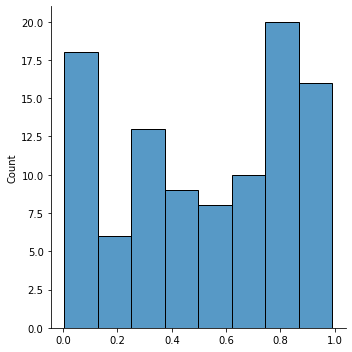

In [29]:
mu = 5
sigma = 3

pvalue_list = list()

for i in range(100):
    data = np.random.normal(mu, sigma, 1000)
    kstest = stats.kstest(data, stats.norm(mu, sigma).cdf)
    pvalue_list.append(kstest.pvalue)
    
sb.displot(pvalue_list)

<h1>TASK 2 LILLIFORD</h1>

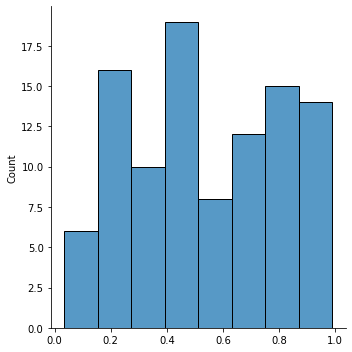

In [30]:
from statsmodels.stats.diagnostic import lilliefors

mu = 5
sigma = 3

pvalue_list = list()

for i in range(100):
    data = np.random.normal(mu, sigma, 1000)
    lftest = lilliefors(data, 'norm')
    pvalue_list.append(lftest[1])
    
sb.displot(pvalue_list)